# Final Project: Analysis of Heart Disease

# Overview
## Introduction
- Libraries
- Data Used


## Data Processing
- Data Observations
- Cleaning Missing Values

## Exploratory Data Analysis (EDA) & Visualization

# Introduction


Our main objective is to analyse the dataset of attributes related to diabetes and to predict whether that person is diabetic or not. We will be applying machine learning algorithms to try to achieve this goal. 


## Libraries:

In [62]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

## Data Used
In the data collection stage of the data life cycle, you need to focus on collecting data from websites and databases. 

We have found data from Kaggle at: 
https://www.kaggle.com/datasets/mathchi/diabetes-data-set

This data has all the attributes needed for predicting diabetes which will aid us to reach our final goal. The data is of 21 year old women at the Pima Indian Heritage. The data is organized with the folloing attributes as described by the website: 


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)




In [2]:
attributes = pd.read_csv("diabetes.csv")
attributes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


As you can see, from the data shown above each individual has an number id and has each attribute filled out.

Outcomes, the most important piece of data is the last column.

In [3]:
attributes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we can see, there are 768 individual data points. There are some interesting points to how much the data points vary for example skin thickness can vary from 23 at the 50th percentile to 99 at the maximum. 

Other things to note is that there are no abnormal conditions seen outside of things expected to see in diabetics, for example the maximum blood preasure is 122 which is within a normal range and isnt considered to be harmful. 

In [4]:
attributes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now we have a more accurate representation of the data. 

# Data Processing

## processing the data:


In [5]:
positive = attributes[attributes['Outcome']==1]
negative = attributes[attributes['Outcome']!=1]
positive.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
11,10,168,74,0,0,38.0,0.537,34,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
15,7,100,0,0,0,30.0,0.484,32,1


In [11]:
def tar_sum(data, col, val): 
    return (data[col] == val).sum()
possum = tar_sum(attributes,"Outcome",1.0)
negsum = tar_sum(attributes,"Outcome",0.0)
total = possum + negsum
print("number of positive outcomes:")
print(possum)
print("percentage of positive outcomes:")
posperc= possum / total *100
print(posperc)
print()
print("number of negative outcomes:")
print(negsum)
print("percentage of negative outcomes:")
negperc = negsum / total *100
print(negperc)

number of positive outcomes:
268
percentage of positive outcomes:
34.89583333333333

number of negative outcomes:
500
percentage of negative outcomes:
65.10416666666666


## missing values
when looking at our dataframe, we saw that some features contained 0s when they shouldn't and it doesnt make sense. We will replace these values with NaN. 

In [13]:
attributes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = attributes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [59]:
def plot_missing(data, key):
    null_feat = pd.DataFrame(len(data[key]) - data.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(data[key]) - (len(data[key]) - data.isnull().sum()))/len(data[key])*100, columns = ['Percent'])
    percentage_null = percentage_null.round(2)
    
    result = pd.concat([null_feat, percentage_null], axis=1, join='inner')
    result.plot(y='Percent',use_index=True, kind = 'bar')
    plt.title('Missing data percentage per attribute')
    plot.ylabel('Percent')
    plot.xlabel('Attribute')
    
    return result


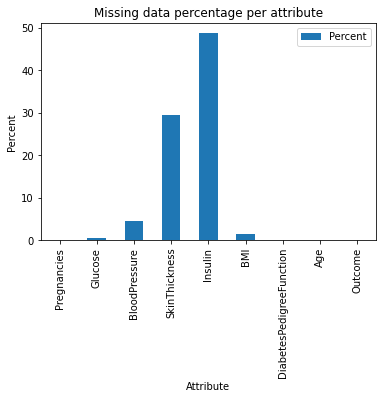

In [60]:
percent_missing = plot_missing(attributes, 'Outcome')

Using the boxplot below we can now see that we no longer have 0s for missing values. They are now encoded with NaN values. 

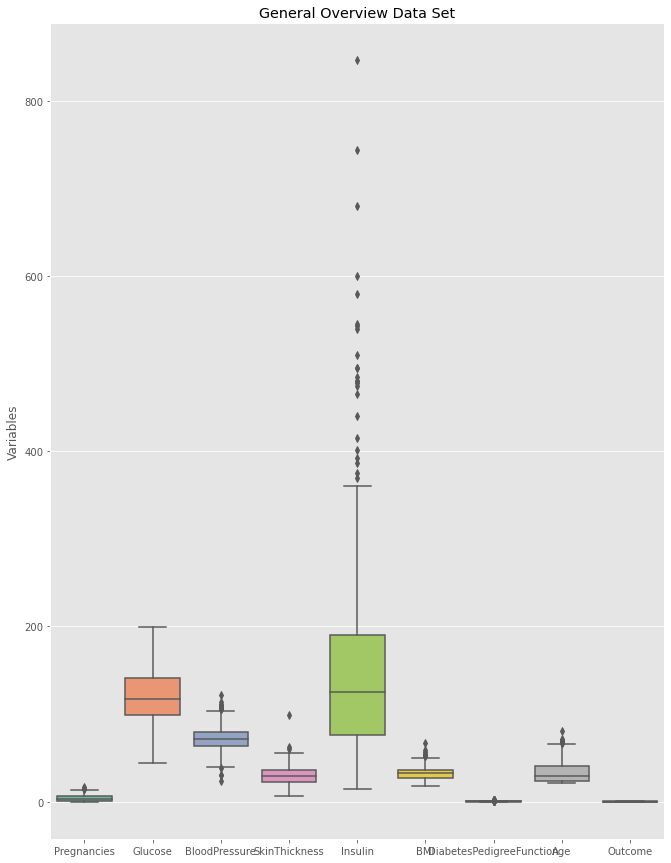

In [64]:
plt.style.use('ggplot') 
f, ax = plt.subplots(figsize=(11, 15))

ax.set(xlim=(-1, 200))
plt.ylabel('Variables')
plt.title("General Overview Data Set")
ax = sns.boxplot(data = attributes, orient = 'v', palette = 'Set2')

We now have a bunch of missing values that we need to fill. The missing data doesn't seem truly random as it isnt evenly spread among all attributes that has missing values. There isn't enough information on how this data was recorded so we cannot assume anything out of the ordinary so we need to assume that the values are missing at random (MAR). 

There are many different imputations but we will be using median imputation (similar to mean) since we have seen in how varied this data can be and the likely hood of outliers. 

In [67]:
filled_attributes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


# Exploratory Data Analysis (EDA) & Visualization
This is the part of the pipeline called exploratory analysis. At this stage we want to observe any possible trends. We can apply statistical analysis to better support our observations and find evidence of the trends found.

In our case it is convienent to finish imputing variables while visualizing and doing EDA so we will be doing that here as well. We will look at the positive and negative results seperately at this point.

In [68]:
positive = attributes[attributes['Outcome']==1]
negative = attributes[attributes['Outcome']!=1]

In [106]:
def median_found(dataset, var):   
    temp = dataset[dataset[var].notnull()]
    tempmed = temp[var].median()
    return tempmed

We will be looking at insulin first to find the median and any trends.

/Users/alessandro/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alessandro/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Insulin of a healthy person'), Text(0.5, 0, 'Insulin')]

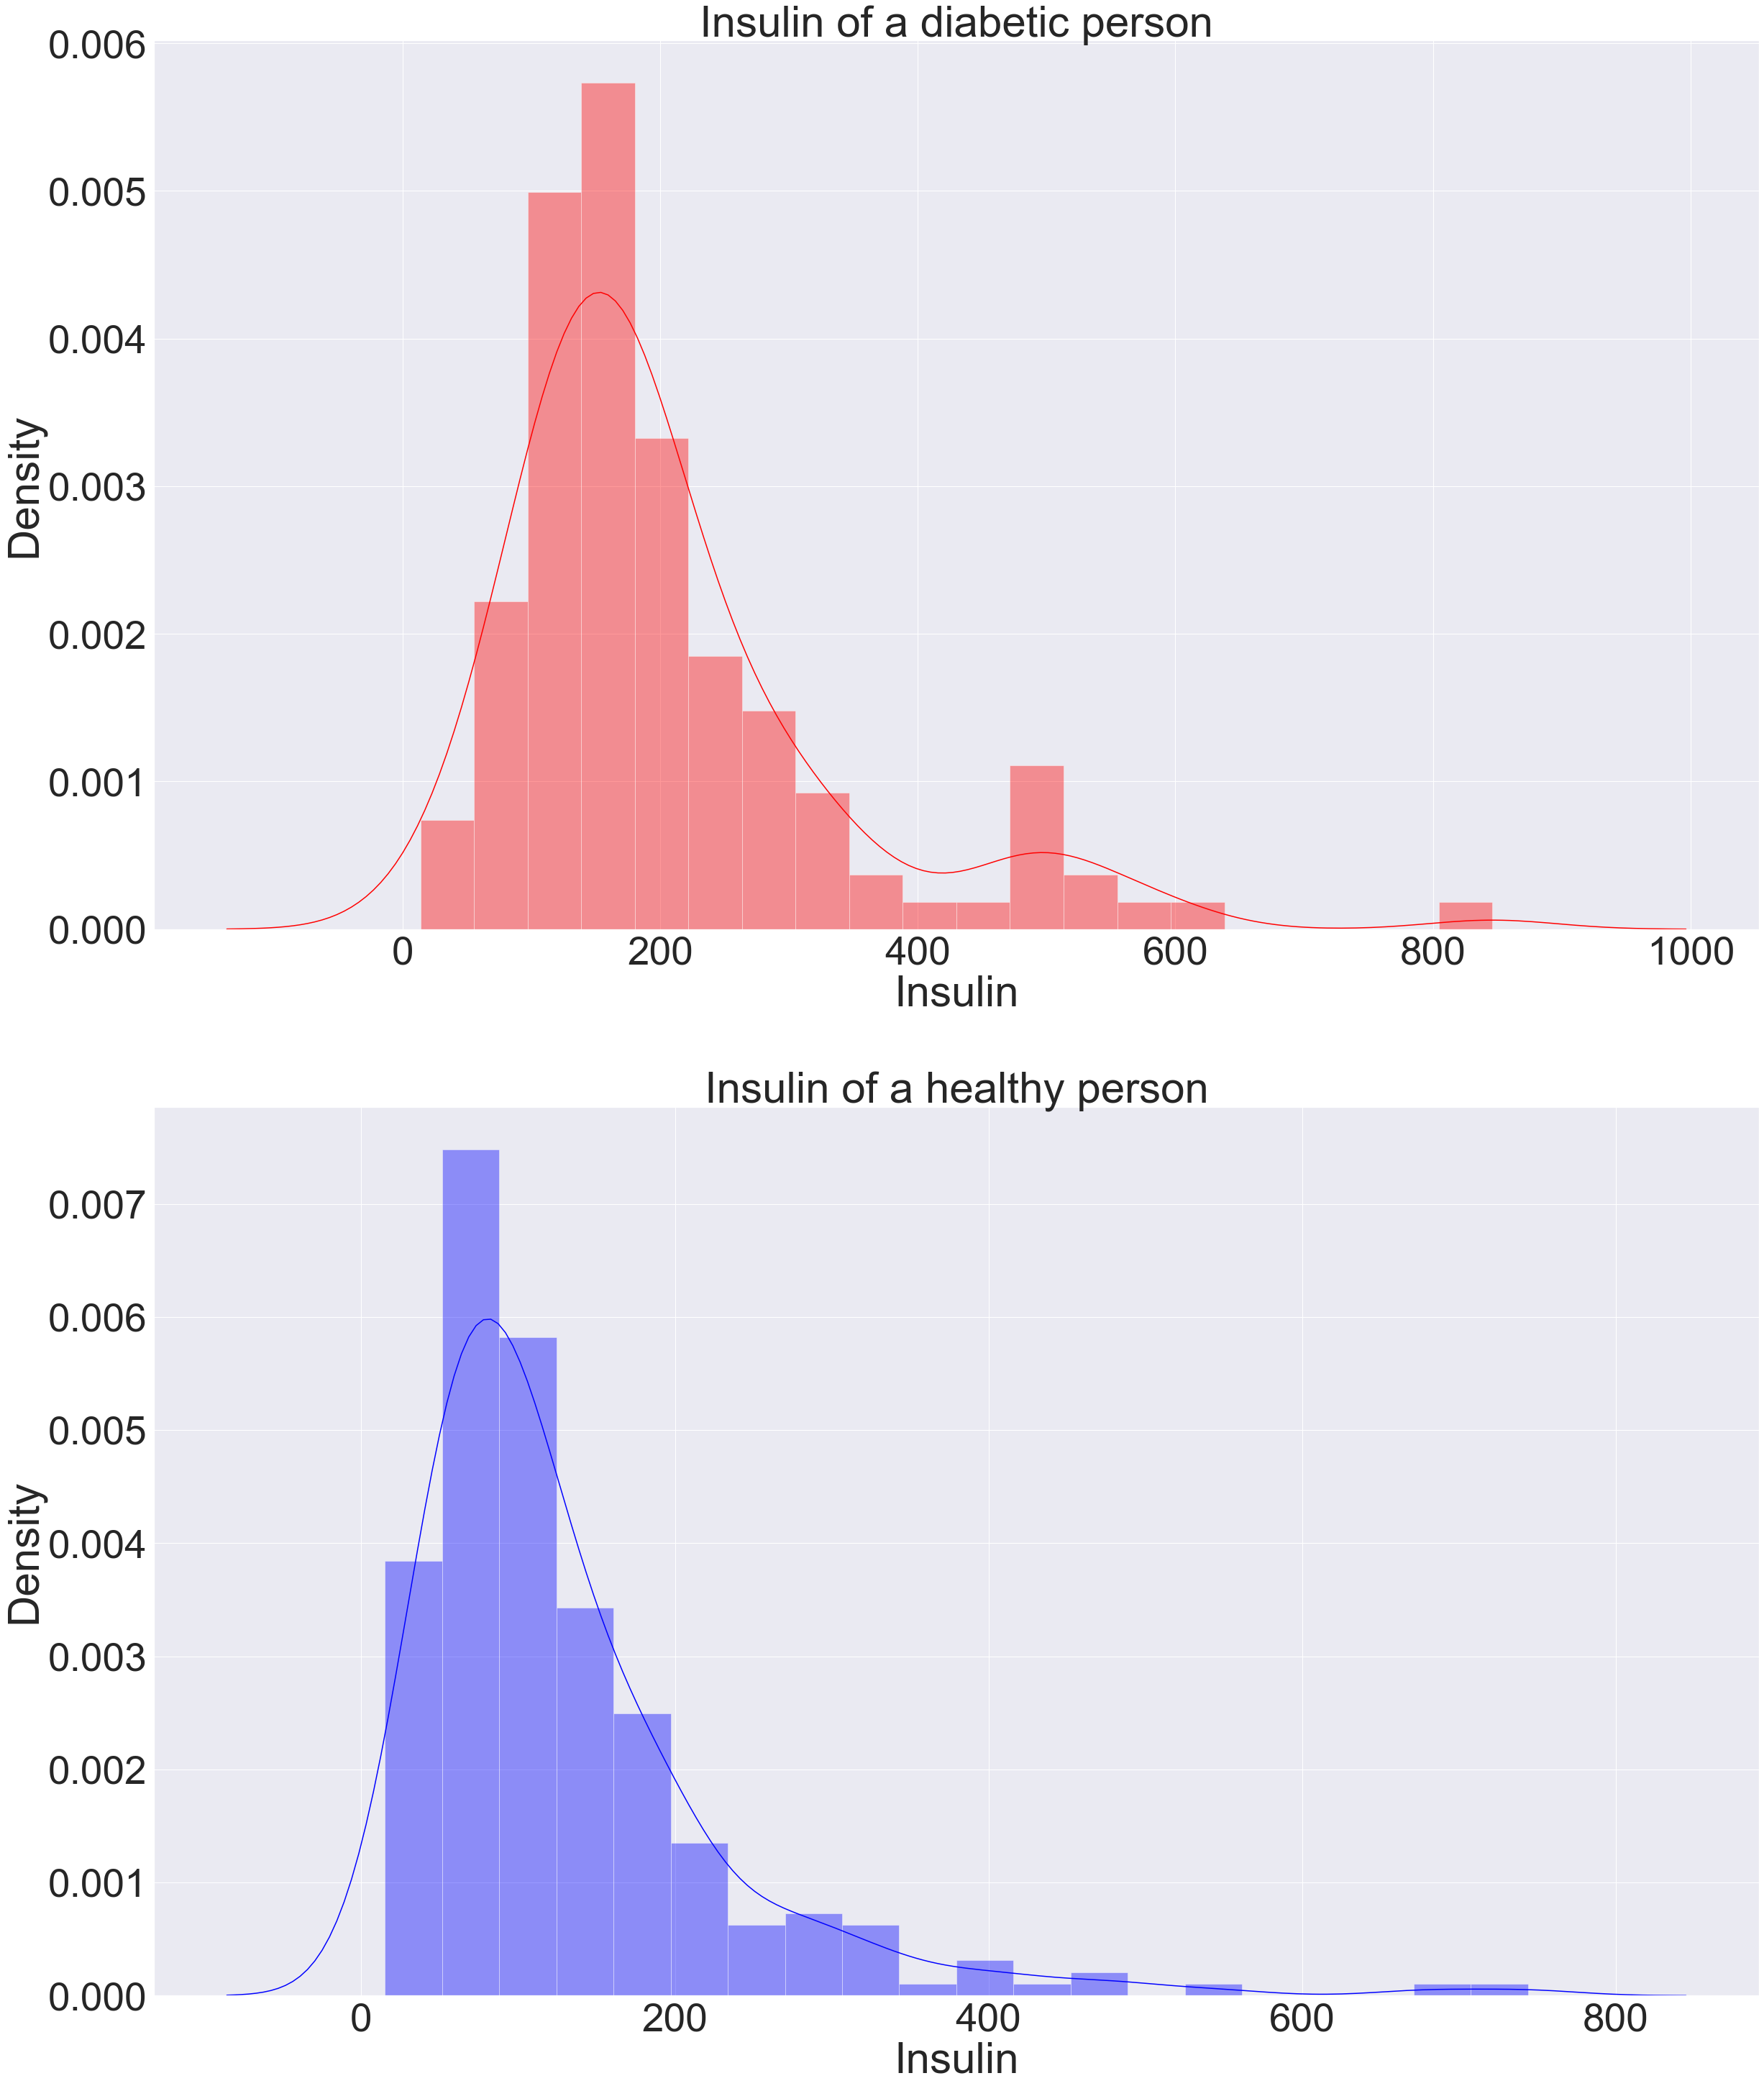

In [143]:
fig, ax = plt.subplots(2,1, figsize=(40,50))
sns.set(font_scale=5)

sns.distplot(positive['Insulin'], bins = 20, color = 'red', \
             ax=ax[0]).set(title='Insulin of a diabetic person', xlabel = 'Insulin')
sns.distplot(negative['Insulin'], bins = 20, color = 'blue', \
             ax=ax[1]).set(title='Insulin of a healthy person', xlabel = 'Insulin')


In [136]:
insulin_median = median_found(positive, 'Insulin')
print("positive diagnosed median:")
print(insulin_median)

positive diagnosed median:
169.5


In [137]:
insulin_median = median_found(negative, 'Insulin')
print("negative diagnosed median:")
print(insulin_median)

negative diagnosed median:
102.5


As we can see there is a drastic change in insulin between a healthy person and unhealthy person. A health person has a median of 102.5 and an unhealthy person has a median of 169.5. 

Now we will median fill the missing values with their respective group (Diabetic or Healthy).

In [139]:
attributes.loc[(attributes['Outcome'] == 0 ) & (attributes['Insulin'].isnull()), 'Insulin'] = 102.5
attributes.loc[(attributes['Outcome'] == 1 ) & (attributes['Insulin'].isnull()), 'Insulin'] = 169.5

Now we need to move on to other attributes and do the same for them. 